In [15]:
import hashlib
import json
from time import time
from uuid import uuid4
from flask import Flask, jsonify, request

class Blockchain:
    def __init__(self):
        self.chain = []
        self.current_transactions = []
        self.nodes = set()

        # Create the genesis block
        self.new_block(previous_hash="1", proof=100)

    def new_block(self, proof, previous_hash=None):
        block = {
            'index': len(self.chain) + 1,
            'timestamp': time(),
            'transactions': self.current_transactions,
            'proof': proof,
            'previous_hash': previous_hash or self.hash(self.chain[-1]),
        }

        # Reset the current list of transactions
        self.current_transactions = []

        self.chain.append(block)
        return block

    def new_transaction(self, sender, recipient, identity_data):
        self.current_transactions.append({
            'sender': sender,
            'recipient': recipient,
            'identity_data': identity_data,
        })
        return self.last_block['index'] + 1

    @property
    def last_block(self):
        return self.chain[-1]

    @staticmethod
    def hash(block):
        block_string = json.dumps(block, sort_keys=True).encode()
        return hashlib.sha256(block_string).hexdigest()

    def proof_of_work(self, last_proof):
        proof = 0
        while self.valid_proof(last_proof, proof) is False:
            proof += 1
        return proof

    @staticmethod
    def valid_proof(last_proof, proof):
        guess = f'{last_proof}{proof}'.encode()
        guess_hash = hashlib.sha256(guess).hexdigest()
        return guess_hash[:4] == "0000"


# Flask App
app = Flask(__name__)

# Unique identifier for this node
node_identifier = str(uuid4()).replace('-', '')

# Instantiate the Blockchain
blockchain = Blockchain()


@app.route('/mine', methods=['GET'])
def mine():
    last_block = blockchain.last_block
    last_proof = last_block['proof']
    proof = blockchain.proof_of_work(last_proof)

    blockchain.new_transaction(
        sender="0",
        recipient=node_identifier,
        identity_data="Blockchain Empowered Digital Identity Management"
    )

    previous_hash = blockchain.hash(last_block)
    block = blockchain.new_block(proof, previous_hash)

    response = {
        'message': "New Block Forged",
        'index': block['index'],
        'transactions': block['transactions'],
        'proof': block['proof'],
        'previous_hash': block['previous_hash'],
    }

    return jsonify(response), 200


@app.route('/transactions/new', methods=['POST'])
def new_transaction():
    values = request.get_json()

    required = ['sender', 'recipient', 'identity_data']
    if not all(k in values for k in required):
        return 'Missing values', 400

    index = blockchain.new_transaction(values['sender'], values['recipient'], values['identity_data'])

    response = {'message': f'Transaction will be added to Block {index}'}
    return jsonify(response), 201


@app.route('/chain', methods=['GET'])
def full_chain():
    response = {
        'chain': blockchain.chain,
        'length': len(blockchain.chain),
    }
    return jsonify(response), 200


if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses.
 * Running on http://192.168.1.147:5000/ (Press CTRL+C to quit)
192.168.1.147 - - [09/Jan/2024 19:20:04] "GET / HTTP/1.1" 404 -
192.168.1.147 - - [09/Jan/2024 19:20:41] "GET / HTTP/1.1" 404 -


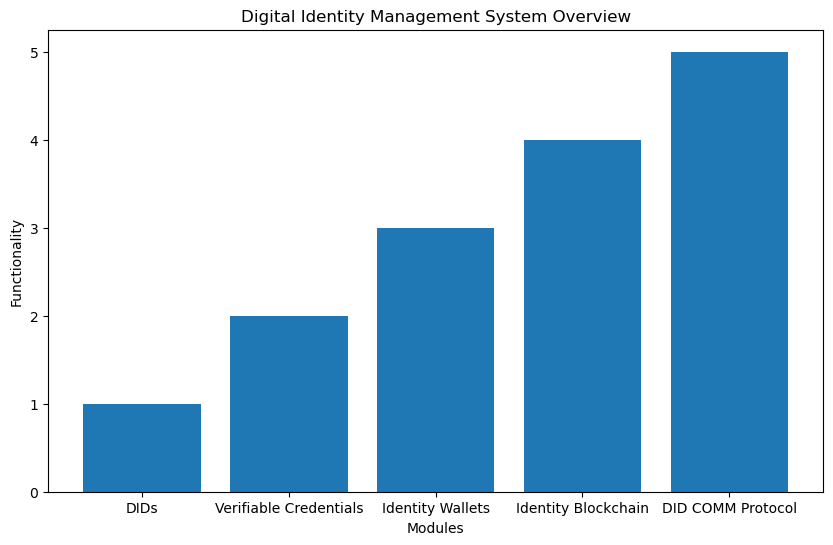

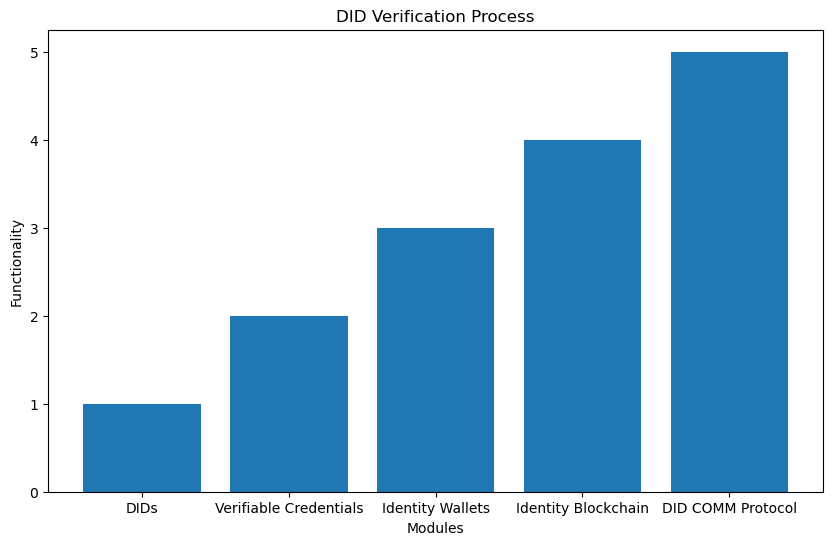

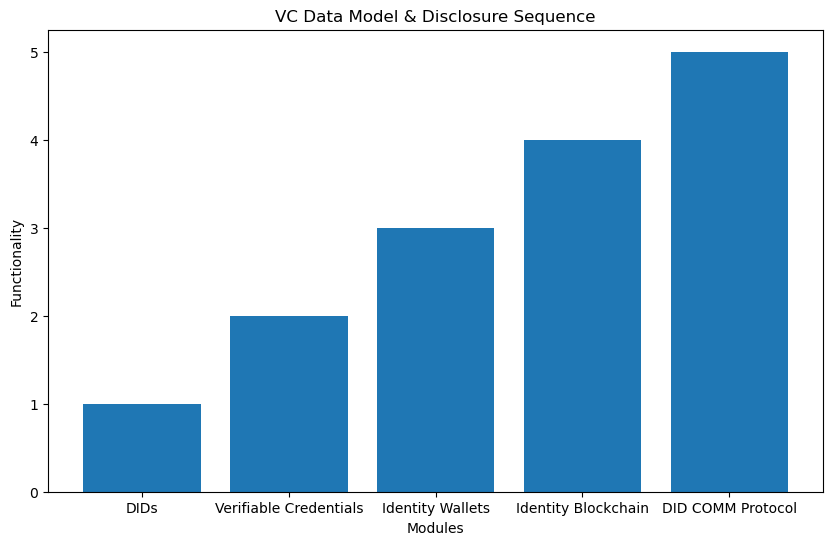

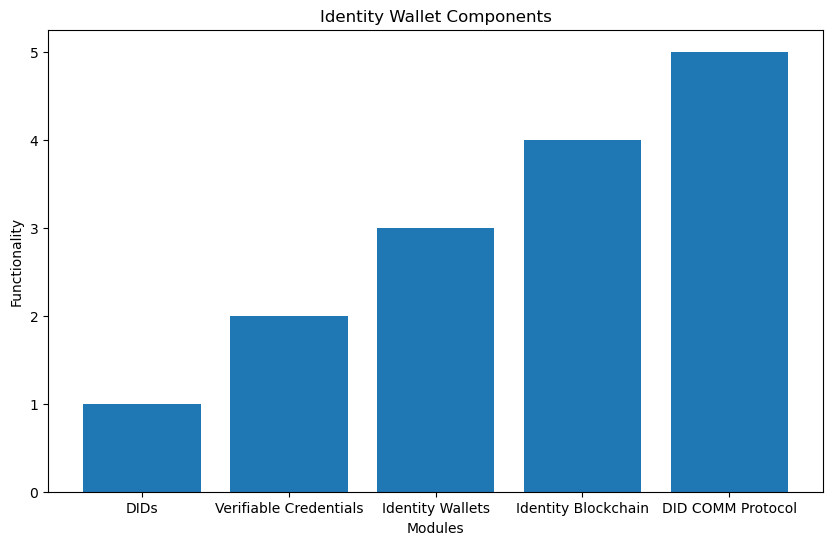

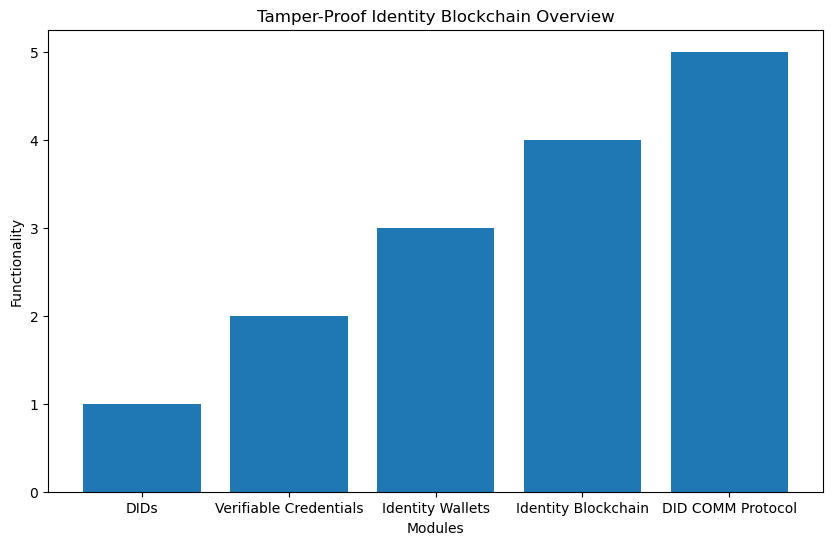

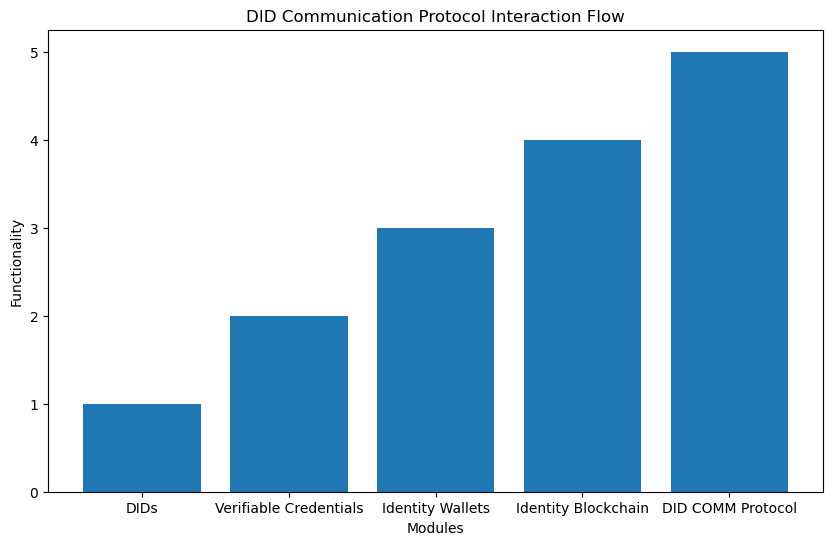

In [16]:
import matplotlib.pyplot as plt
# Function to plot graphs
def plot_graph(title, x_label, y_label, data, colors=None):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    if colors:
        plt.bar(data.keys(), data.values(), color=colors)
    else:
        plt.bar(data.keys(), data.values())

    plt.show()

# Functionality of different modules
modules_functionality = {
    "DIDs": 1,
    "Verifiable Credentials": 2,
    "Identity Wallets": 3,
    "Identity Blockchain": 4,
    "DID COMM Protocol": 5,
}

# Graph 1: Digital Identity Management System Overview
plot_graph("Digital Identity Management System Overview", "Modules", "Functionality", modules_functionality)
# Graph 2: DID Verification Process
plot_graph("DID Verification Process", "Modules", "Functionality", modules_functionality)
# Graph 3: VC Data Model & Disclosure Sequence
plot_graph("VC Data Model & Disclosure Sequence", "Modules", "Functionality", modules_functionality)
# Graph 4: Identity Wallet Components
plot_graph("Identity Wallet Components", "Modules", "Functionality", modules_functionality)
# Graph 5: Tamper-Proof Identity Blockchain Overview
plot_graph("Tamper-Proof Identity Blockchain Overview", "Modules", "Functionality", modules_functionality)
# Graph 6: DID Communication Protocol Interaction Flow
plot_graph("DID Communication Protocol Interaction Flow", "Modules", "Functionality", modules_functionality)

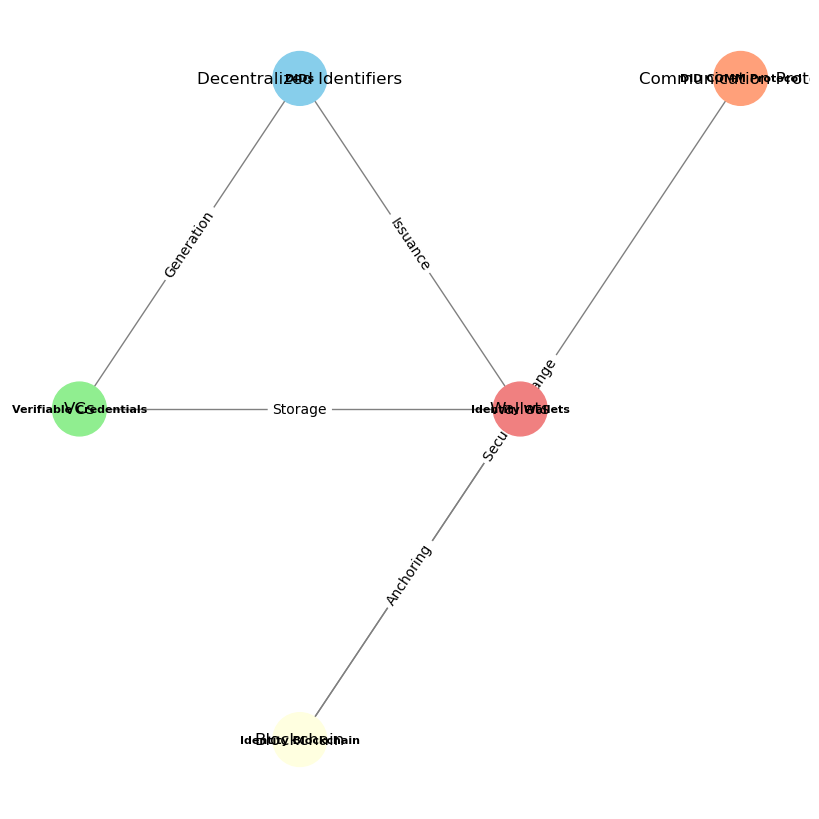

In [17]:
import matplotlib.pyplot as plt
import networkx as nx

# Function to plot enhanced network graph with manual node positioning
def plot_enhanced_network_graph(nodes, edges, node_labels=None, edge_labels=None, node_colors=None):
    G = nx.Graph()

    # Add nodes
    G.add_nodes_from(nodes)

    # Add edges
    G.add_edges_from(edges)

    # Manually set node positions for better spacing
    pos = {
        "DIDs": (1, 2),
        "Verifiable Credentials": (0, 1),
        "Identity Wallets": (2, 1),
        "Identity Blockchain": (1, 0),
        "DID COMM Protocol": (3, 2)
    }
    
    # Adjust figure size
    plt.figure(figsize=(8, 8))

    nx.draw(G, pos, with_labels=True, font_weight='bold', node_color=node_colors, node_size=1500, font_size=8, edge_color='gray')

    # Add labels to nodes
    if node_labels:
        nx.draw_networkx_labels(G, pos, labels=node_labels)

    # Add labels to edges
    if edge_labels:
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.show()

# Nodes and edges for the enhanced network graph
nodes = ["DIDs", "Verifiable Credentials", "Identity Wallets", "Identity Blockchain", "DID COMM Protocol"]
edges = [("DIDs", "Verifiable Credentials"), ("DIDs", "Identity Wallets"), ("Verifiable Credentials", "Identity Wallets"),
         ("Identity Wallets", "Identity Blockchain"), ("Identity Blockchain", "DID COMM Protocol")]

# Additional information
node_labels = {"DIDs": "Decentralized Identifiers", "Verifiable Credentials": "VCs", "Identity Wallets": "Wallets",
               "Identity Blockchain": "Blockchain", "DID COMM Protocol": "Communication Protocol"}

edge_labels = {("DIDs", "Verifiable Credentials"): "Generation", ("DIDs", "Identity Wallets"): "Issuance",
               ("Verifiable Credentials", "Identity Wallets"): "Storage",
               ("Identity Wallets", "Identity Blockchain"): "Anchoring",
               ("Identity Blockchain", "DID COMM Protocol"): "Secure Exchange"}

node_colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightsalmon']

# Plot the enhanced network graph with manual node positioning
plot_enhanced_network_graph(nodes, edges, node_labels=node_labels, edge_labels=edge_labels, node_colors=node_colors)
